In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from keras.models import Sequential
from keras.layers import Dense,Conv2D,LSTM
from keras.optimizers import Adam
from keras.losses import binary_crossentropy,categorical_crossentropy

In [6]:
df=pd.read_csv("set_main.csv")
df

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,2.998796,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1.525880e+09,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,1.525880e+09,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,2.998804,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,1.525880e+09,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446616,122,1.562165e+09,CbiAr234EfpzQInxbg,0.0.0.0,68.0,255.255.255.255,67.0,-1.000000,-1,-1,...,0,0,0,1,0,0,0,0,0,0
1446617,123,1.562165e+09,CqEhZf1lYmVokqECn3,::,143.0,ff02::16,0.0,-1.000000,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1446618,124,1.562165e+09,Cr5vKO1CGfMQwFp22c,::,135.0,ff02::1:ffd5:cdf,136.0,-1.000000,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1446619,125,1.562165e+09,CQ5cJ21U9NUbUWIznd,fe80::5bcc:698e:39d5:cdf,143.0,ff02::16,0.0,-1.000000,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df=df.drop(columns=["Unnamed: 0"])
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,2.998796,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,0.000000,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1.525880e+09,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,0.000000,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,1.525880e+09,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,2.998804,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1.525880e+09,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,0.000000,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446616,1.562165e+09,CbiAr234EfpzQInxbg,0.0.0.0,68.0,255.255.255.255,67.0,-1.000000,-1,-1,0.0,...,0,0,0,1,0,0,0,0,0,0
1446617,1.562165e+09,CqEhZf1lYmVokqECn3,::,143.0,ff02::16,0.0,-1.000000,-1,-1,0.0,...,0,0,0,0,0,0,0,0,0,0
1446618,1.562165e+09,Cr5vKO1CGfMQwFp22c,::,135.0,ff02::1:ffd5:cdf,136.0,-1.000000,-1,-1,0.0,...,0,0,0,0,0,0,0,0,0,0
1446619,1.562165e+09,CQ5cJ21U9NUbUWIznd,fe80::5bcc:698e:39d5:cdf,143.0,ff02::16,0.0,-1.000000,-1,-1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df["label"].value_counts()

X = df[['duration','orig_bytes','resp_bytes','missed_bytes','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','proto_icmp','proto_tcp','proto_udp','conn_state_OTH','conn_state_REJ','conn_state_RSTO','conn_state_RSTOS0','conn_state_RSTR','conn_state_RSTRH','conn_state_S0','conn_state_S1','conn_state_S2','conn_state_S3','conn_state_SF','conn_state_SH','conn_state_SHR']].values

In [9]:

X=MinMaxScaler().fit_transform(X)
X

array([[5.07195406e-05, 5.73121586e-10, 2.97162380e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.26837029e-05, 5.73121586e-10, 2.97162380e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.26837029e-05, 5.73121586e-10, 2.97162380e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [20]:
y=pd.get_dummies(df[['label']],dtype='uint8').values
y=MinMaxScaler().fit_transform(y)
y,y.shape

(array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 (1446621, 11))

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)



X_train.shape,y_train.shape

((1157296, 24), (1157296, 11))

In [29]:
nn=Sequential()

nn.add(Dense(2000,input_dim=24,activation='relu'))
nn.add(tf.keras.layers.Dropout(0.2))
nn.add(Dense(1500, activation='relu'))
nn.add(tf.keras.layers.Dropout(0.2))
nn.add(Dense(800,activation='relu'))
nn.add(tf.keras.layers.Dropout(0.2))
nn.add(Dense(400,activation='relu'))
nn.add(tf.keras.layers.Dropout(0.2))
nn.add(Dense(150,activation='relu'))
nn.add(tf.keras.layers.Dropout(0.2))
nn.add(Dense(11, activation='sigmoid'))
nn.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 2000)              50000     
                                                                 
 dropout_28 (Dropout)        (None, 2000)              0         
                                                                 
 dense_37 (Dense)            (None, 1500)              3001500   
                                                                 
 dropout_29 (Dropout)        (None, 1500)              0         
                                                                 
 dense_38 (Dense)            (None, 800)               1200800   
                                                                 
 dropout_30 (Dropout)        (None, 800)               0         
                                                                 
 dense_39 (Dense)            (None, 400)              

In [30]:
model=nn.fit(X_train,y_train,batch_size=648,epochs=50,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
1786/1786 [==============================] - 15s 8ms/step - loss: 0.8706 - accuracy: 0.6926 - val_loss: 0.8587 - val_accuracy: 0.6937
Epoch 2/50
1786/1786 [==============================] - 13s 7ms/step - loss: 0.8609 - accuracy: 0.6938 - val_loss: 0.8593 - val_accuracy: 0.6937
Epoch 3/50
1786/1786 [==============================] - 13s 7ms/step - loss: 0.8602 - accuracy: 0.6939 - val_loss: 0.8595 - val_accuracy: 0.6937
Epoch 4/50
1786/1786 [==============================] - 13s 7ms/step - loss: 0.8597 - accuracy: 0.6939 - val_loss: 0.8585 - val_accuracy: 0.6937
Epoch 5/50
1786/1786 [==============================] - 13s 7ms/step - loss: 0.8593 - accuracy: 0.6939 - val_loss: 0.8590 - val_accuracy: 0.6938
Epoch 6/50
1786/1786 [==============================] - 14s 8ms/step - loss: 0.8590 - accuracy: 0.6939 - val_loss: 0.8586 - val_accuracy: 0.6937
Epoch 7/50
1786/1786 [==============================] - 13s 7ms/step - loss: 0.8589 - accuracy: 0.6939 - val_loss: 0.8592 - val_ac

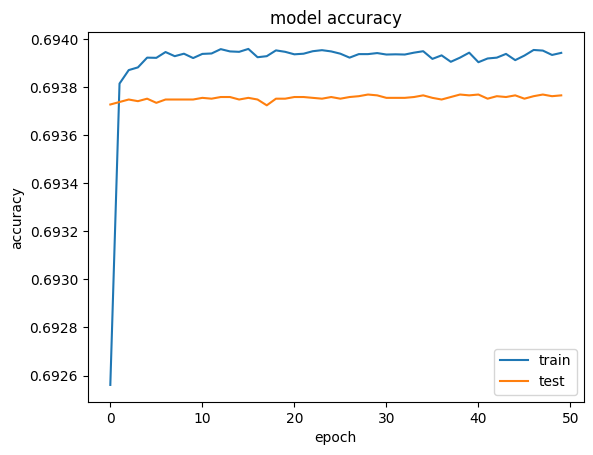

In [31]:
plt.subplot(1,1,1)
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

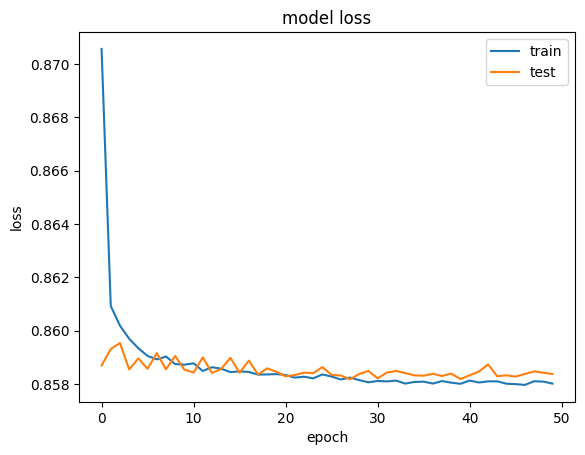

In [33]:
plt.subplot(1,1,1)
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')